# Mini-batch stochastic gradient descent

## Hyperparamters

In [140]:
batch_size = 1024
num_epochs = 2
learning_rate = 0.1

## 1. Prepare data

In [104]:
import torch
import torchvision

In [105]:
!ls -l ../data

drwxr-xr-x@ - ajcd2020  7 Feb 15:39 MNIST


In [106]:
(5,), (5, 2), (5)

((5,), (5, 2), 5)

In [107]:
?torchvision.transforms.Normalize

In [141]:
data_path = "../data/"

mnist_transforms = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_data = torchvision.datasets.MNIST(
    root=data_path, train=True, download=True, transform=mnist_transforms
)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, shuffle=True
)

valid_data = torchvision.datasets.MNIST(
    root=data_path, train=False, transform=mnist_transforms
)

valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=len(valid_data))

train_data.data.shape, train_data.targets.shape, valid_data.data.shape, valid_data.targets.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

In [109]:
train_data.targets.shape

torch.Size([60000])

In [110]:
train_data.targets[:10]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [111]:
train_data.targets.unique().shape

torch.Size([10])

In [112]:
train_data[0][0].shape, train_data[0][1]

(torch.Size([1, 28, 28]), 5)

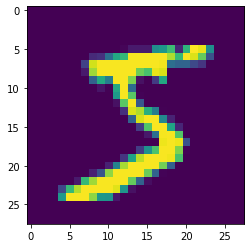

In [113]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0][0].squeeze())

# train_data[0]

torch.Size([60000, 1, 28, 28]) torch.Size([60000])


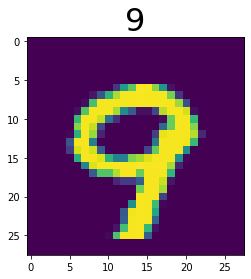

In [114]:
for images, labels in train_loader:
    
    print(images.shape, labels.shape)
    
    first_image_in_batch = images[0]
    
    plt.imshow(first_image_in_batch.squeeze())
    plt.title(labels[0].item(), fontsize=32)
    break

## 2. Create the neural network model

In [115]:
nx = 28 * 28
ny = 10

# Why should we have 10 outputs neurons? Why not 1?
# It makes learning harder.
# A 1 is closer looking to a 7, but how do we make sure the loss
# function indicates such a characteristic?

# All parameters have requires_grad=True set
model = torch.nn.Sequential(torch.nn.Linear(in_features=nx, out_features=ny))

## 3. Create the loss function (vs. cost)

In [116]:
# For this class
# - loss is the error for a single training example
# - cost is the average loss for all training examples in a batch

loss = torch.nn.CrossEntropyLoss()

## 4. Implement mini-batch stochastic gradient descent

In [117]:
# Loop
#     compute network outputs
#     compute loss
#     compute derivatices
#     update parameters


for epoch in range(num_epochs):
    
    # Set model to training mode
    model.train()
    
    # Update the model parameters (weights and biases, for now...)
    train_count = 0
    train_cost = 0
    for X, y in train_loader:
        
#         print(X.view(-1, nx).shape, y.shape)

        # Compute network outputs
        yhat = model(X.view(-1, nx))
        
        # Compute cost
        cost = loss(yhat, y)
        
        # Compute gradients
        model.zero_grad()
        cost.backward()
        
        # Update paramters
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
        
        train_count += X.shape[0]
        train_cost += cost.item()
    
    
    # Set model to evaluation/inference mode
    model.eval()
    
    valid_count = 0
    valid_cost = 0
    valid_correct = 0
    with torch.no_grad():
        for X, y in valid_loader:
            
            # Compute model
            yhat = model(X.view(-1, nx))
            cost = loss(yhat, y)
            
            # Convert model ouput into discrete predictions
            predictions = yhat.argmax(dim=1, keepdim=True)
            
            # Compute the number of correct predictions
            correct = predictions.eq(y.view_as(predictions)).double().sum().item()
            
            valid_count += X.shape[0]
            valid_cost += cost.item()
            valid_correct += correct
    
        
    print(epoch, train_cost / train_count, valid_cost / valid_count, valid_correct / valid_count)

print('done')

0 4.056929349899292e-05 0.00015028257369995116 0.5464
1 2.5438714027404785e-05 0.00011821191310882569 0.6481
done


In [118]:
X.shape, X.view(-1, 28*28).shape

(torch.Size([10000, 1, 28, 28]), torch.Size([10000, 784]))

In [119]:
X[0, 0, :4, :4]

tensor([[-0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242]])

In [120]:
X.view(-1, 28*28)[0, :16]

tensor([-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242])

In [121]:
60000/11

5454.545454545455

In [122]:
y.shape

torch.Size([10000])

In [123]:
train_data.data.shape[0] / batch_size

1.0

## Why is mini-batch SGD doing better than batch GD

## A simplified example

In [144]:
for epoch in range(num_epochs):
    
    # Update the model parameters (weights and biases, for now...)
    for X, y in train_loader:
        
        # Compute network outputs
        
        print(X.shape, X.view(-1, nx).shape)
        
        yhat = model(X.view(-1, nx))
        
        print(yhat.shape, y.shape)
        
        # Compute cost (averaged across outputs and averaged across examples)
        cost = loss(yhat, y)
        
        # Compute gradients
        model.zero_grad()
        cost.backward()
        
        # Update paramters
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad

torch.Size([1024, 1, 28, 28]) torch.Size([1024, 784])
torch.Size([1024, 10]) torch.Size([1024])


## What does .view(.) do?

In [132]:
m = 10
s = 3
test_x = torch.randn(m, 1, s, s)

In [133]:
test_x.shape

torch.Size([10, 1, 3, 3])

In [134]:
test_x[0]

tensor([[[ 1.4553,  0.7525, -1.0200],
         [ 0.9015, -1.5583,  1.5643],
         [ 0.8502, -1.0633,  0.7950]]])

In [136]:
test_x.view(10, s*s)[0]

tensor([ 1.4553,  0.7525, -1.0200,  0.9015, -1.5583,  1.5643,  0.8502, -1.0633,
         0.7950])

In [145]:
yhat[:4], y[:4]

(tensor([[-2.7862e-01, -2.4249e+00, -2.4432e+00, -4.8203e-01,  1.7354e+00,
           5.2753e-03,  2.0173e-01,  1.8084e-01, -3.4677e-01,  2.2480e+00],
         [-1.7831e+00,  1.1494e+00, -4.4402e-01,  1.4853e-01, -7.3438e-01,
          -1.0603e-01,  1.1895e+00, -7.7136e-01,  1.6888e-01, -2.0557e-01],
         [-1.5728e+00, -2.4993e-01, -1.2287e+00,  5.1157e-01, -1.0426e+00,
           5.1899e-02,  5.5372e-01,  9.1097e-01,  1.6721e+00,  3.4615e-01],
         [ 2.7168e-01, -1.1921e+00,  2.4070e-03,  7.1422e-01, -1.1906e+00,
          -1.0701e-01,  7.6300e-02, -1.0817e+00,  4.9301e-01, -5.6308e-01]],
        grad_fn=<SliceBackward>),
 tensor([4, 6, 8, 3]))

## What does `backward()` do?

In [146]:
?cost

In [147]:
torch.randn(5, requires_grad=True)

TypeError: randn() received an invalid combination of arguments - got (int, use_grad=bool), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, torch.Generator generator, tuple of names names, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, torch.Generator generator, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


In [148]:
x = torch.randn(1, requires_grad=True)
y = x ** 2
y.backward()

In [149]:
x

tensor([1.0622], requires_grad=True)

In [150]:
x.grad

tensor([2.1244])

In [151]:
2* x

tensor([2.1244], grad_fn=<MulBackward0>)